# **Import Libraries**

In [ ]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, auc
from sklearn.metrics import confusion_matrix

**Load Dataset**

In [ ]:
with open("./data/task1_multiomics_data.pickle", "rb") as file:
    data_multiomics = pickle.load(file)

# show dataset
data_multiomics.head()

Training/Validation Gates ID       MRN Study Subject ID Number     Sex  \
                                                                           
0                   T  PTLG002  16661779                   10565    Male   
1                   T  PTLG002  16661779                   10565    Male   
2                   T  PTLG002  16661779                   10565    Male   
3                   T  PTLG002  16661779                   10565    Male   
4                   T  PTLG004  23587868                   10603  Female   

  sex_bin timepoint gestational_age cellfree_rna                ...  \
                                       0_C2orf76      1_ACTL10  ...   
0       1         1              11     0.312437 -1.892930e-16  ...   
1       1         2              18     0.312437 -1.892930e-16  ...   
2       1         3              32     0.312437 -1.892930e-16  ...   
3       1         4              45     0.312437 -1.892930e-16  ...   
4       0         1              11     5.204209  1.734736e+00  ...   

  plasma_somalogic                                                             \
       1290_UBE2G2 1291_TAGLN2 1292_ATP5O 1293_POMC 1294_CRYZL1 1295_SERPINF1   
0           4804.4      2233.0     3610.9     715.8       151.4       37885.8   
1           4086.0      2160.5     2260.4     825.2       161.0       41821.5   
2           4328.0      1818.4     2445.2    1241.8       194.6       45526.1   
3           3442.4      2661.4     3879.2     703.6       153.7       36862.5   
4           4261.9      1804.6     1470.6     526.8       163.0       38938.3   

                                              
  1296_CTSF 1297_FTCD 1298_USP25 1299_PLXNB2  
0    1479.1    3261.8      561.3      3227.0  
1    1465.1    1839.8      597.8      3366.0  
2    1428.3    3057.2      625.7      8703.7  
3    1063.6    7339.7      593.2      2918.9  
4    1170.1    1036.8      552.8      3457.1  

[5 rows x 61274 columns]

# **Data Preprocessing**

**Select features**

In [ ]:
# Select immune system features
immune_system_df = data_multiomics["immune_system"]

# Show dataset
immune_system_df.head()

,0_Bcells,1_CD16+CD56-NKcells,2_CD4+Tcells_mem,3_CD4+Tcells_naive,4_CD4+Tcells,5_CD45RA+Tregs,6_CD45RA-Tregs,7_CD56+CD16-NKcells,8_CD7+NKcells,9_CD8+Tcells_mem,...,524_M-MDSC_STAT5_Unstim,525_mDCs_STAT5_Unstim,526_ncMCs_STAT5_Unstim,527_pDCs_STAT5_Unstim,528_Tbet+CD4+Tcells_mem_STAT5_Unstim,529_Tbet+CD4+Tcells_naive_STAT5_Unstim,530_Tbet+CD8+Tcells_mem_STAT5_Unstim,531_Tbet+CD8+Tcells_naive_STAT5_Unstim,532_TCRgd+Tcells_STAT5_Unstim,533_Tregs_STAT5_Unstim
0,0.053164,0.054978,0.297875,0.136289,0.445832,0.002570,0.013848,0.007052,0.070836,0.118884,...,0.998954,0.953637,1.082629,0.808610,0.504269,0.757424,0.462045,0.454665,0.443859,0.529431
1,0.052857,0.069794,0.279917,0.140350,0.430839,0.002470,0.010923,0.004759,0.080245,0.127831,...,0.930847,0.822618,0.931126,0.728738,0.613059,0.852393,0.506981,0.474408,0.491691,0.574133
2,0.053202,0.050829,0.277997,0.187659,0.479078,0.003473,0.013359,0.005302,0.063781,0.104513,...,1.077824,0.970954,1.011011,0.749277,0.752882,0.813249,0.560379,0.481862,0.505706,0.640245
3,0.049906,0.090496,0.266336,0.156263,0.432904,0.003071,0.014459,0.004318,0.101386,0.115243,...,0.976888,0.918164,1.028114,0.790166,0.505349,0.648406,0.464522,0.445444,0.438285,0.573058
4,0.103067,0.004128,0.162746,0.103950,0.270840,0.003198,0.007988,0.007153,0.090763,0.057064,...,0.890405,0.800468,1.067789,0.563615,0.464563,1.004497,0.378557,0.423530,0.332368,0.447904


**Feature Engineering**

In [ ]:
# Set an appropriate correlation threshold
# to remove highly correlated columns for feature engineering
threshold = 0.95

# Create correlation matrix
corr_matrix = immune_system_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

# Drop features
immune_system_df = immune_system_df.drop(to_drop, axis=1)

**Add Target Column for classification**

In [ ]:
# Add target variable
immune_system_df['Sex'] = data_multiomics['Sex']

# Check unique values in dataset
immune_system_df['Sex'].unique()

array(['Male', 'Female'], dtype=object)

**Apply Label Encoding on Target Column**

In [ ]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Perform a train-test split for regression
X = immune_system_df.drop('Sex', axis=1)  # Features
y = immune_system_df['Sex']  # Target variable

# Transform the labels in the test set using the same encoder
y_encode = label_encoder.fit_transform(y)

# Adjust the test_size and random_state based on your requirements
X_train, X_test, y_train, y_test = train_test_split(X, y_encode, test_size=0.25, random_state=42)

## **Evaluation Metrics Functions**

In [ ]:
# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


# Function to plot both ROC and Precision-Recall curves
def plot_roc_and_pr_curves(y_true, y_pred):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    precision, recall, _ = precision_recall_curve(y_true, y_pred)

    roc_auc = auc(fpr, tpr)
    pr_auc = auc(recall, precision)

    # Plot ROC curve
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')

    # Plot Precision-Recall curve
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve (area = {:.2f})'.format(pr_auc))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()


# **Model Training**

Without Normalization

### **SVM Model**

Best hyperparameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
SVM Accuracy: 1.0
Classification Report (SVM):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         8

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



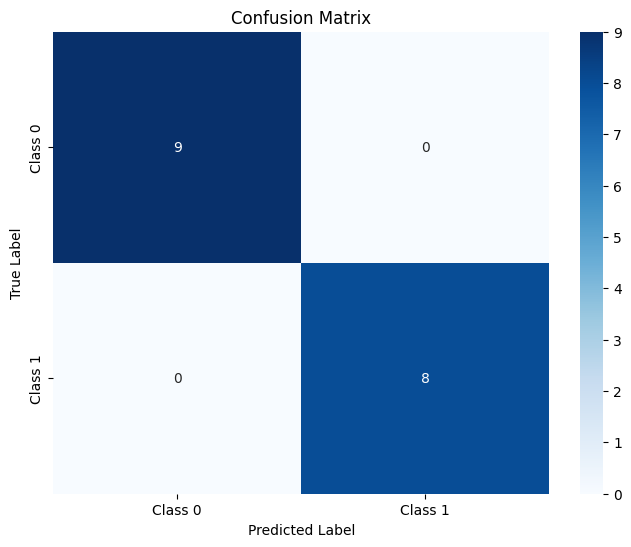

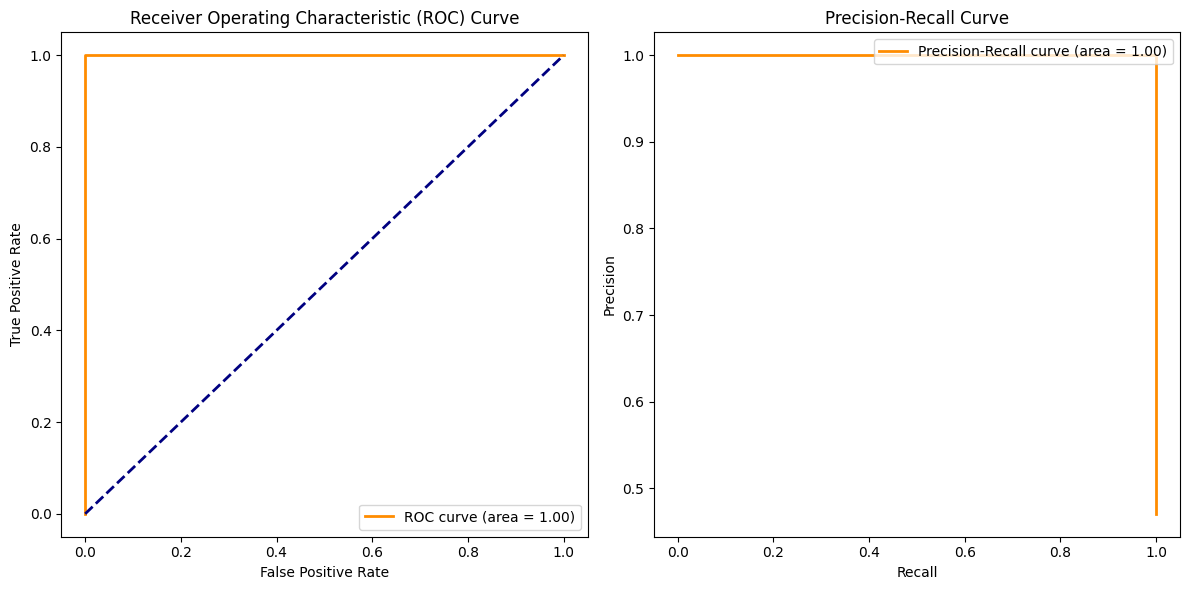

In [ ]:
# Support Vector Machine (SVM)
param_grid_svm = {'C': [0.1, 1, 10],
                  'kernel': ['linear', 'rbf', 'poly'],
                  'gamma': ['scale', 'auto']}

grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train, y_train)

# Best hyperparameters for SVM
best_params_svm = grid_search_svm.best_params_
print("Best hyperparameters for SVM:", best_params_svm)

# Evaluate SVM on the test set with the best hyperparameters
best_svm_model = SVC(**best_params_svm)
best_svm_model.fit(X_train, y_train)
y_pred_svm = best_svm_model.predict(X_test)

# Evaluate SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)
classification_report_svm = classification_report(y_test, y_pred_svm)

print(f'SVM Accuracy: {accuracy_svm}')
# print('Confusion Matrix (SVM):\n', confusion_matrix_svm)
print('Classification Report (SVM):\n', classification_report_svm)

# Visualize the results
plot_confusion_matrix(y_test, y_pred_svm, classes=['Class 0', 'Class 1'], normalize=True)

# Visualize the ROC and Precision-Recall curves
plot_roc_and_pr_curves(y_test, y_pred_svm)

### **Decision Tree Model**

Best hyperparameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Decision Tree Accuracy: 0.8235294117647058
Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.75      1.00      0.86         9
           1       1.00      0.62      0.77         8

    accuracy                           0.82        17
   macro avg       0.88      0.81      0.81        17
weighted avg       0.87      0.82      0.82        17



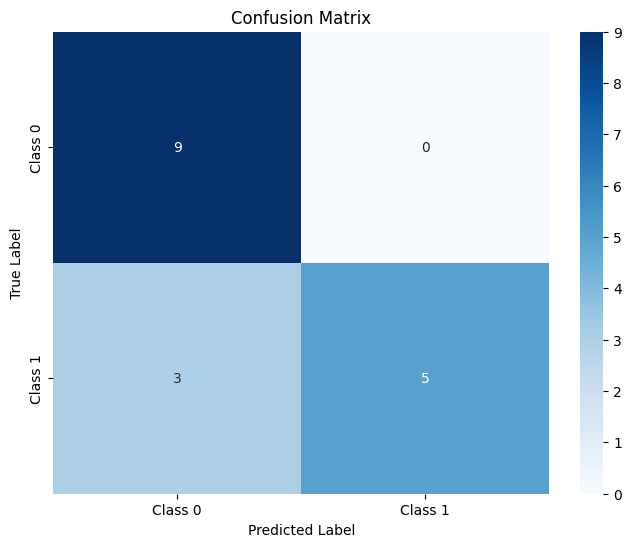

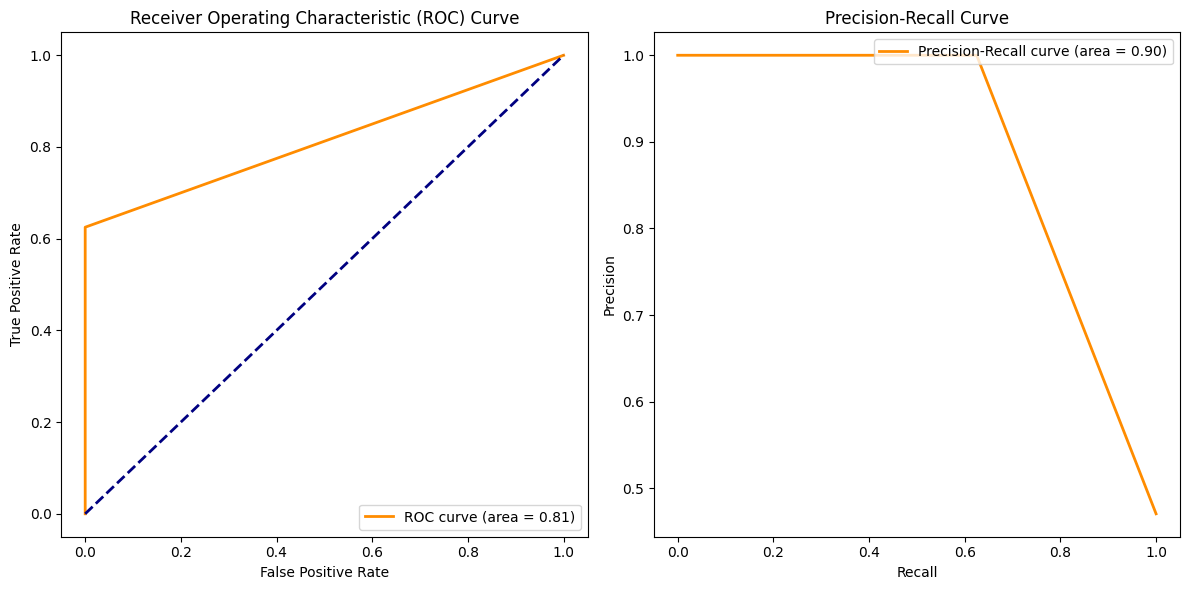

In [ ]:
# Decision Tree
param_grid_decision_tree = {'max_depth': [None, 10, 20, 30],
                            'min_samples_split': [2, 5, 10],
                            'min_samples_leaf': [1, 2, 4]}

grid_search_decision_tree = GridSearchCV(DecisionTreeClassifier(random_state=42),
                                         param_grid_decision_tree,
                                         cv=5,
                                         scoring='accuracy',
                                         n_jobs=-1)
grid_search_decision_tree.fit(X_train, y_train)

# Best hyperparameters for Decision Tree
best_params_decision_tree = grid_search_decision_tree.best_params_
print("Best hyperparameters for Decision Tree:", best_params_decision_tree)

# Evaluate Decision Tree on the test set with the best hyperparameters
best_decision_tree_model = DecisionTreeClassifier(**best_params_decision_tree, random_state=42)
best_decision_tree_model.fit(X_train, y_train)
y_pred_decision_tree = best_decision_tree_model.predict(X_test)

# Evaluate Decision Tree
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
confusion_matrix_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
classification_report_decision_tree = classification_report(y_test, y_pred_decision_tree)

print(f'Decision Tree Accuracy: {accuracy_decision_tree}')
# print('Confusion Matrix (Decision Tree):\n', confusion_matrix_decision_tree)
print('Classification Report (Decision Tree):\n', classification_report_decision_tree)

# Visualize the results
plot_confusion_matrix(y_test, y_pred_decision_tree, classes=['Class 0', 'Class 1'], normalize=True)

# Visualize the ROC and Precision-Recall curves
plot_roc_and_pr_curves(y_test, y_pred_decision_tree)

## **AdaBoost Model**

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best hyperparameters for AdaBoost: {'learning_rate': 0.01, 'n_estimators': 50}
AdaBoost Accuracy: 0.7647058823529411
Classification Report (AdaBoost):
               precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       0.83      0.62      0.71         8

    accuracy                           0.76        17
   macro avg       0.78      0.76      0.76        17
weighted avg       0.78      0.76      0.76        17



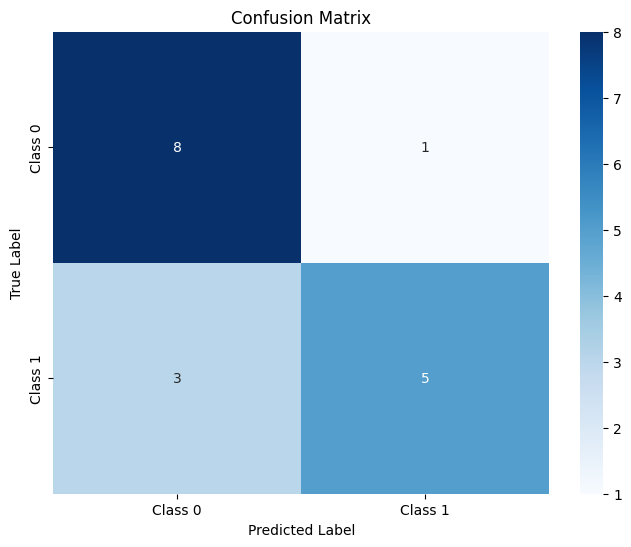

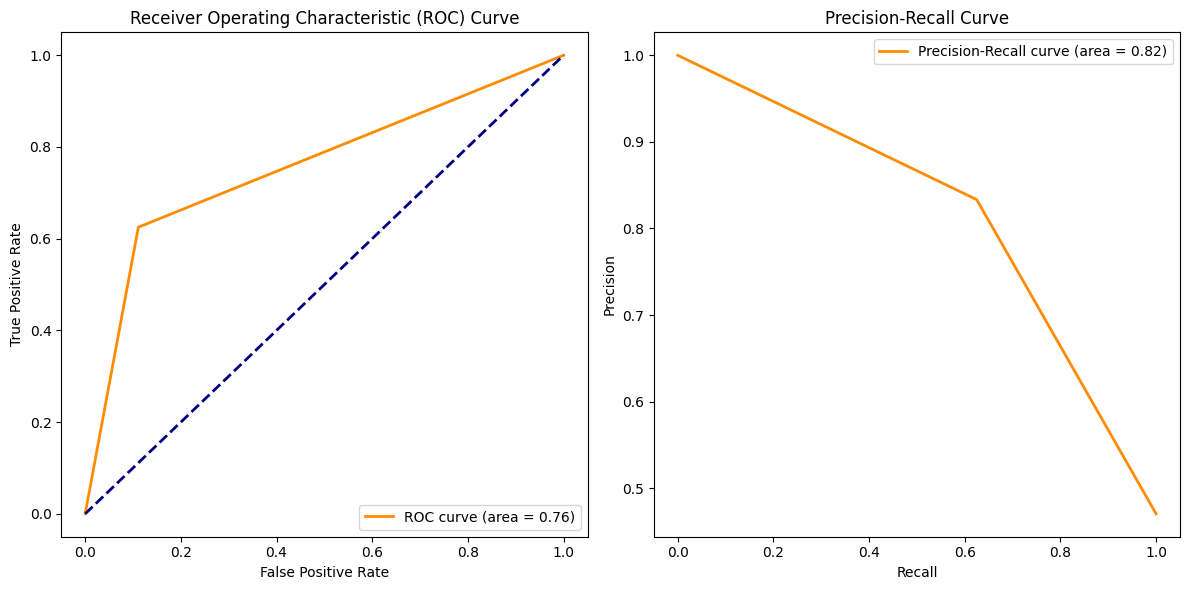

In [ ]:
# AdaBoost
param_grid_adaboost = {'n_estimators': [50, 100, 150],
                       'learning_rate': [0.01, 0.1, 1]}

grid_search_adaboost = GridSearchCV(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                                                       random_state=42),
                                    param_grid_adaboost,
                                    cv=5,
                                    scoring='accuracy',
                                    n_jobs=-1)
grid_search_adaboost.fit(X_train, y_train)

# Best hyperparameters for AdaBoost
best_params_adaboost = grid_search_adaboost.best_params_
print("Best hyperparameters for AdaBoost:", best_params_adaboost)

# Evaluate AdaBoost on the test set with the best hyperparameters
best_adaboost_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                                         **best_params_adaboost,
                                         random_state=42)
best_adaboost_model.fit(X_train, y_train)
y_pred_adaboost = best_adaboost_model.predict(X_test)

# Evaluate AdaBoost
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
confusion_matrix_adaboost = confusion_matrix(y_test, y_pred_adaboost)
classification_report_adaboost = classification_report(y_test, y_pred_adaboost)

print(f'AdaBoost Accuracy: {accuracy_adaboost}')
# print('Confusion Matrix (AdaBoost):\n', confusion_matrix_adaboost)
print('Classification Report (AdaBoost):\n', classification_report_adaboost)

# Visualize the results
plot_confusion_matrix(y_test, y_pred_adaboost, classes=['Class 0', 'Class 1'], normalize=True)

# Visualize the ROC and Precision-Recall curves
plot_roc_and_pr_curves(y_test, y_pred_adaboost)

### **XGBoost Model**

Best hyperparameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
XGBoost Accuracy: 0.8235294117647058
Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.86      0.75      0.80         8

    accuracy                           0.82        17
   macro avg       0.83      0.82      0.82        17
weighted avg       0.83      0.82      0.82        17



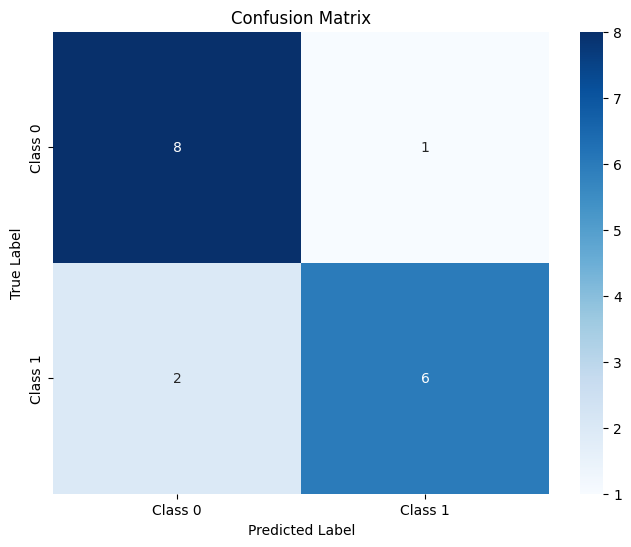

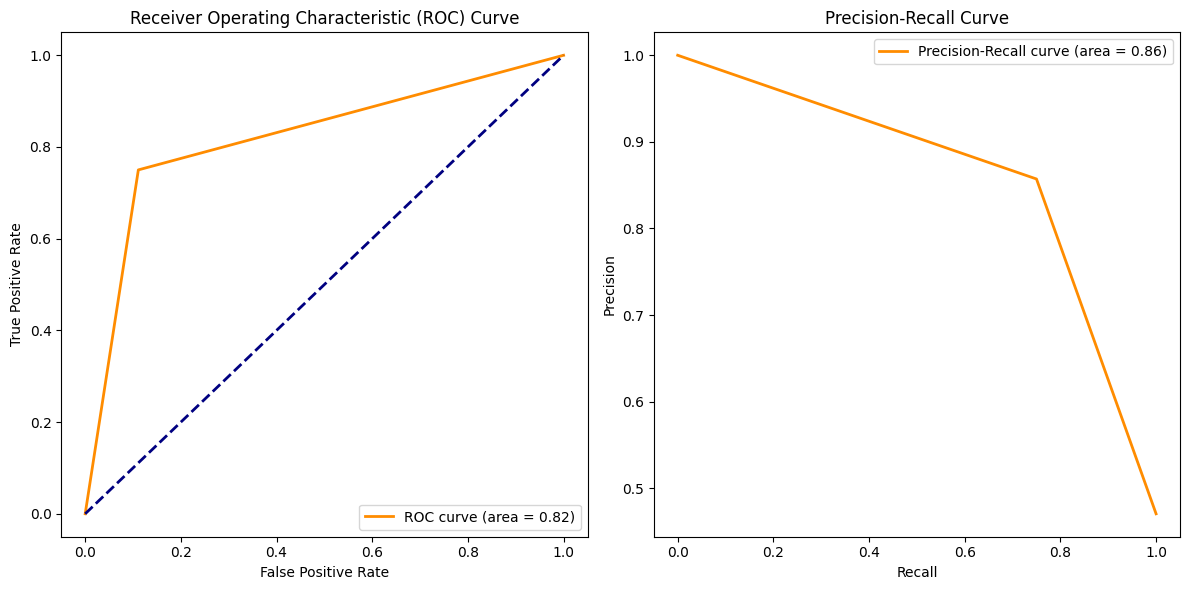

In [ ]:
# XGBoost
param_grid_xgboost = {'n_estimators': [50, 100, 150],
                      'learning_rate': [0.01, 0.1, 1],
                      'max_depth': [3, 5, 7]}

grid_search_xgboost = GridSearchCV(XGBClassifier(random_state=42),
                                   param_grid_xgboost,
                                   cv=5,
                                   scoring='accuracy',
                                   n_jobs=-1)
grid_search_xgboost.fit(X_train, y_train)

# Best hyperparameters for XGBoost
best_params_xgboost = grid_search_xgboost.best_params_
print("Best hyperparameters for XGBoost:", best_params_xgboost)

# Evaluate XGBoost on the test set with the best hyperparameters
best_xgboost_model = XGBClassifier(**best_params_xgboost, random_state=42)
best_xgboost_model.fit(X_train, y_train)
y_pred_xgboost = best_xgboost_model.predict(X_test)

# Evaluate XGBoost
accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)
confusion_matrix_xgboost = confusion_matrix(y_test, y_pred_xgboost)
classification_report_xgboost = classification_report(y_test, y_pred_xgboost)

print(f'XGBoost Accuracy: {accuracy_xgboost}')
# print('Confusion Matrix (XGBoost):\n', confusion_matrix_xgboost)
print('Classification Report (XGBoost):\n', classification_report_xgboost)

# Visualize the results
plot_confusion_matrix(y_test, y_pred_xgboost, classes=['Class 0', 'Class 1'], normalize=True)

# Visualize the ROC and Precision-Recall curves
plot_roc_and_pr_curves(y_test, y_pred_xgboost)

### **Random Forest Model**

Best hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Random Forest Accuracy: 0.8823529411764706
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       1.00      0.75      0.86         8

    accuracy                           0.88        17
   macro avg       0.91      0.88      0.88        17
weighted avg       0.90      0.88      0.88        17



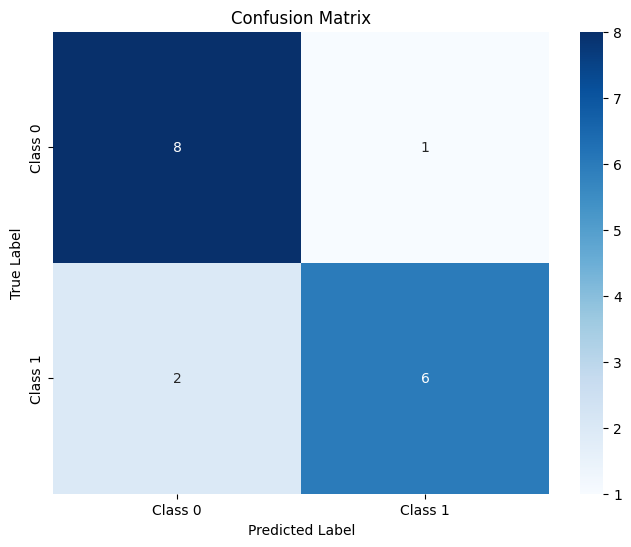

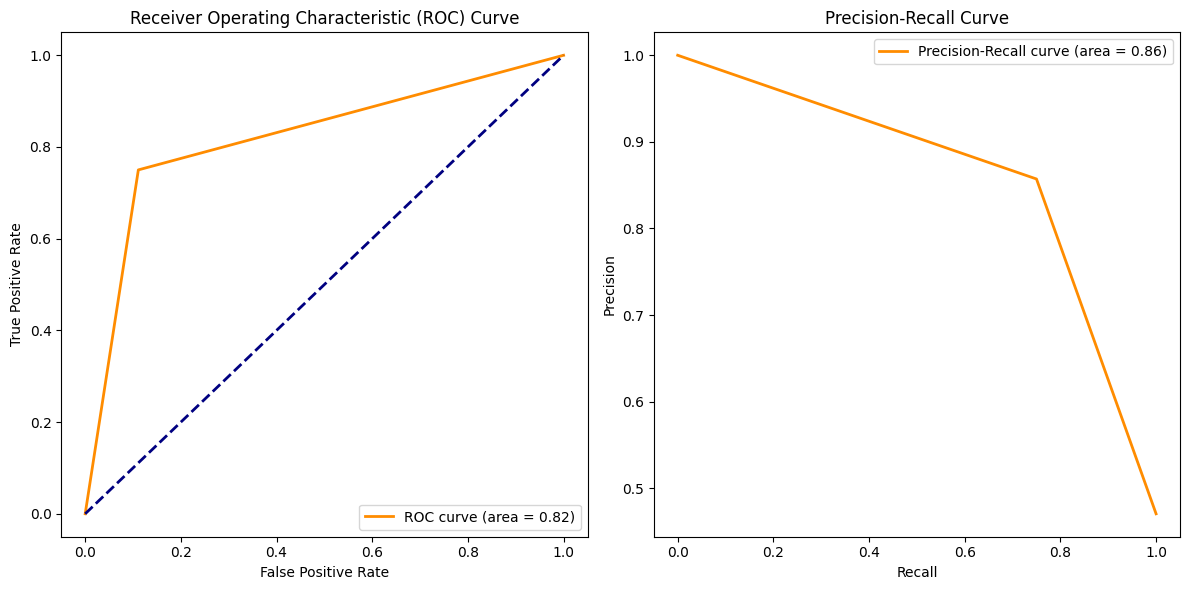

In [ ]:
# Random Forest
param_grid_random_forest = {'n_estimators': [50, 100, 150],
                             'max_depth': [None, 10, 20, 30],
                             'min_samples_split': [2, 5, 10],
                             'min_samples_leaf': [1, 2, 4]}

grid_search_random_forest = GridSearchCV(RandomForestClassifier(random_state=42),
                                          param_grid_random_forest,
                                          cv=5,
                                          scoring='accuracy',
                                          n_jobs=-1)
grid_search_random_forest.fit(X_train, y_train)

# Best hyperparameters for Random Forest
best_params_random_forest = grid_search_random_forest.best_params_
print("Best hyperparameters for Random Forest:", best_params_random_forest)

# Evaluate Random Forest on the test set with the best hyperparameters
best_random_forest_model = RandomForestClassifier(**best_params_random_forest, random_state=42)
best_random_forest_model.fit(X_train, y_train)
y_pred_random_forest = best_random_forest_model.predict(X_test)

# Evaluate Random Forest
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
confusion_matrix_random_forest = confusion_matrix(y_test, y_pred_random_forest)
classification_report_random_forest = classification_report(y_test, y_pred_random_forest)

print(f'Random Forest Accuracy: {accuracy_random_forest}')
# print('Confusion Matrix (Random Forest):\n', confusion_matrix_random_forest)
print('Classification Report (Random Forest):\n', classification_report_random_forest)

# Visualize the results
plot_confusion_matrix(y_test, y_pred_xgboost, classes=['Class 0', 'Class 1'], normalize=True)

# Visualize the ROC and Precision-Recall curves
plot_roc_and_pr_curves(y_test, y_pred_xgboost)

With Normalization

In [ ]:
# Standardize the data (optional, but often recommended for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **SVM Model**

Best hyperparameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
SVM Accuracy: 1.0
Classification Report (SVM):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         8

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



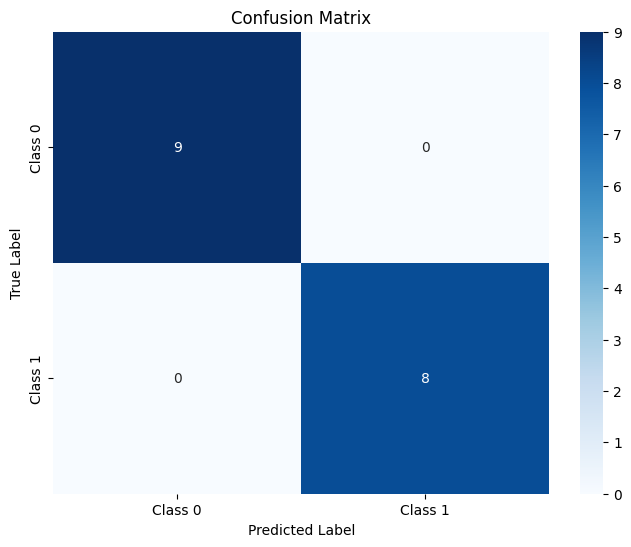

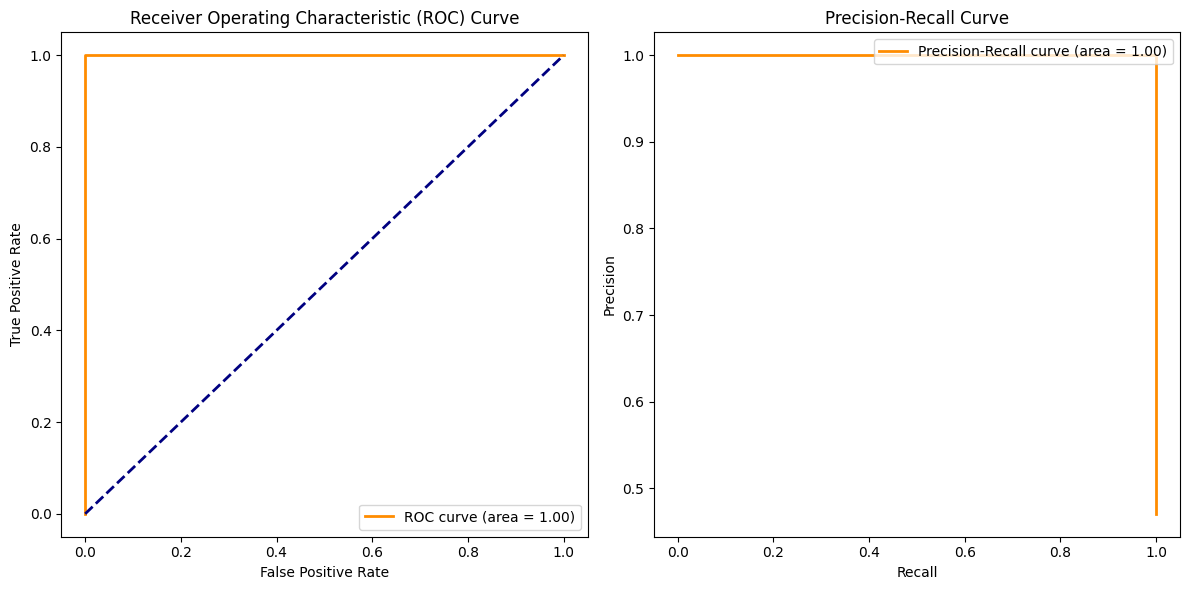

In [ ]:
# Support Vector Machine (SVM)
param_grid_svm = {'C': [0.1, 1, 10],
                  'kernel': ['linear', 'rbf', 'poly'],
                  'gamma': ['scale', 'auto']}

grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train_scaled, y_train)

# Best hyperparameters for SVM
best_params_svm = grid_search_svm.best_params_
print("Best hyperparameters for SVM:", best_params_svm)

# Evaluate SVM on the test set with the best hyperparameters
best_svm_model = SVC(**best_params_svm)
best_svm_model.fit(X_train_scaled, y_train)
y_pred_svm = best_svm_model.predict(X_test_scaled)

# Evaluate SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)
classification_report_svm = classification_report(y_test, y_pred_svm)

print(f'SVM Accuracy: {accuracy_svm}')
# print('Confusion Matrix (SVM):\n', confusion_matrix_svm)
print('Classification Report (SVM):\n', classification_report_svm)

# Visualize the results
plot_confusion_matrix(y_test, y_pred_svm, classes=['Class 0', 'Class 1'], normalize=True)

# Visualize the ROC and Precision-Recall curves
plot_roc_and_pr_curves(y_test, y_pred_svm)

### **Decision Tree Model**

Best hyperparameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Decision Tree Accuracy: 0.8235294117647058
Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.75      1.00      0.86         9
           1       1.00      0.62      0.77         8

    accuracy                           0.82        17
   macro avg       0.88      0.81      0.81        17
weighted avg       0.87      0.82      0.82        17



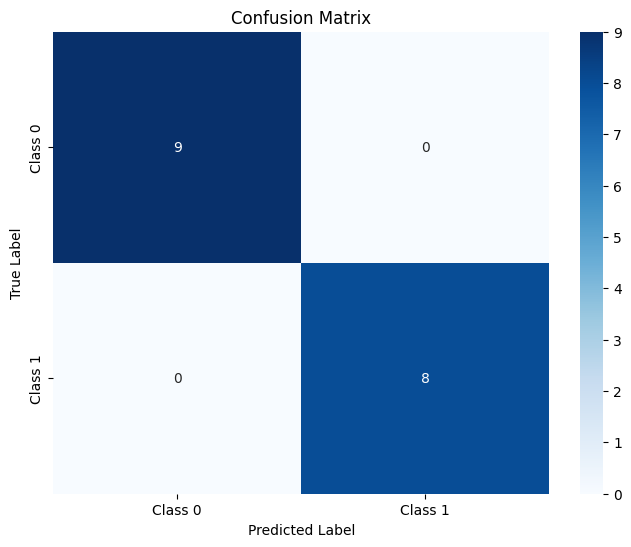

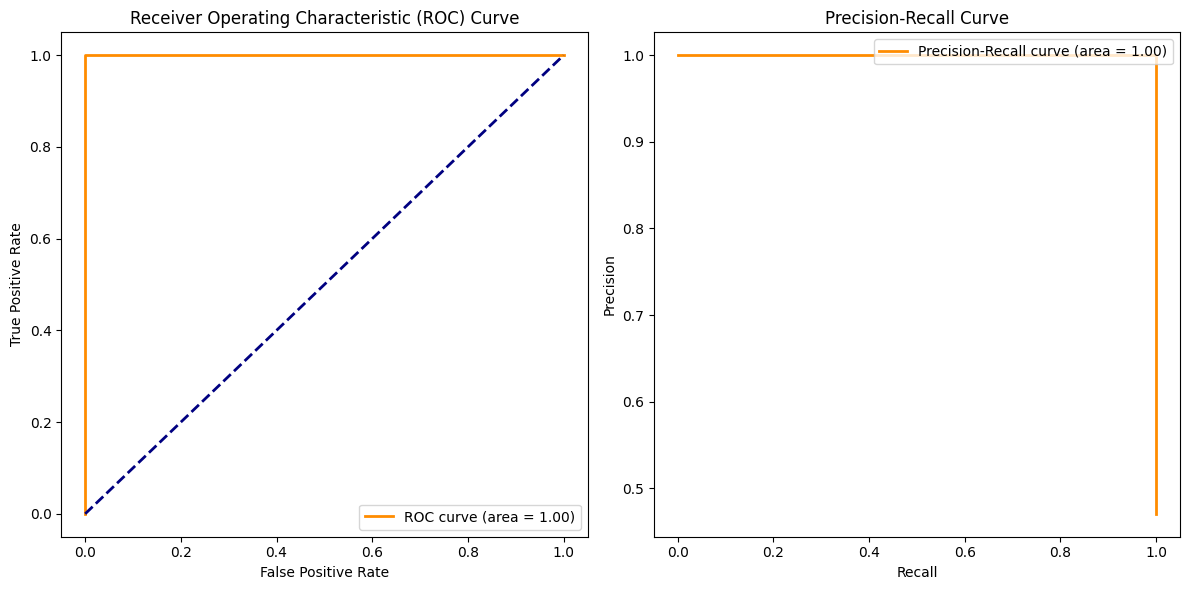

In [ ]:
# Decision Tree
param_grid_decision_tree = {'max_depth': [None, 10, 20, 30],
                            'min_samples_split': [2, 5, 10],
                            'min_samples_leaf': [1, 2, 4]}

grid_search_decision_tree = GridSearchCV(DecisionTreeClassifier(random_state=42),
                                         param_grid_decision_tree,
                                         cv=5,
                                         scoring='accuracy',
                                         n_jobs=-1)
grid_search_decision_tree.fit(X_train, y_train)

# Best hyperparameters for Decision Tree
best_params_decision_tree = grid_search_decision_tree.best_params_
print("Best hyperparameters for Decision Tree:", best_params_decision_tree)

# Evaluate Decision Tree on the test set with the best hyperparameters
best_decision_tree_model = DecisionTreeClassifier(**best_params_decision_tree, random_state=42)
best_decision_tree_model.fit(X_train, y_train)
y_pred_decision_tree = best_decision_tree_model.predict(X_test)

# Evaluate Decision Tree
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
confusion_matrix_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
classification_report_decision_tree = classification_report(y_test, y_pred_decision_tree)

print(f'Decision Tree Accuracy: {accuracy_decision_tree}')
# print('Confusion Matrix (Decision Tree):\n', confusion_matrix_decision_tree)
print('Classification Report (Decision Tree):\n', classification_report_decision_tree)

# Visualize the results
plot_confusion_matrix(y_test, y_pred_svm, classes=['Class 0', 'Class 1'], normalize=True)

# Visualize the ROC and Precision-Recall curves
plot_roc_and_pr_curves(y_test, y_pred_svm)

### **AdaBoost Model**

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best hyperparameters for AdaBoost: {'learning_rate': 0.01, 'n_estimators': 50}
AdaBoost Accuracy: 0.7647058823529411
Classification Report (AdaBoost):
               precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       0.83      0.62      0.71         8

    accuracy                           0.76        17
   macro avg       0.78      0.76      0.76        17
weighted avg       0.78      0.76      0.76        17



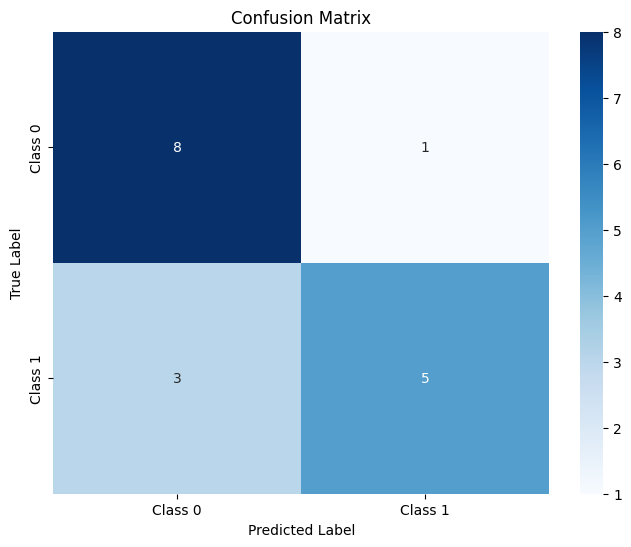

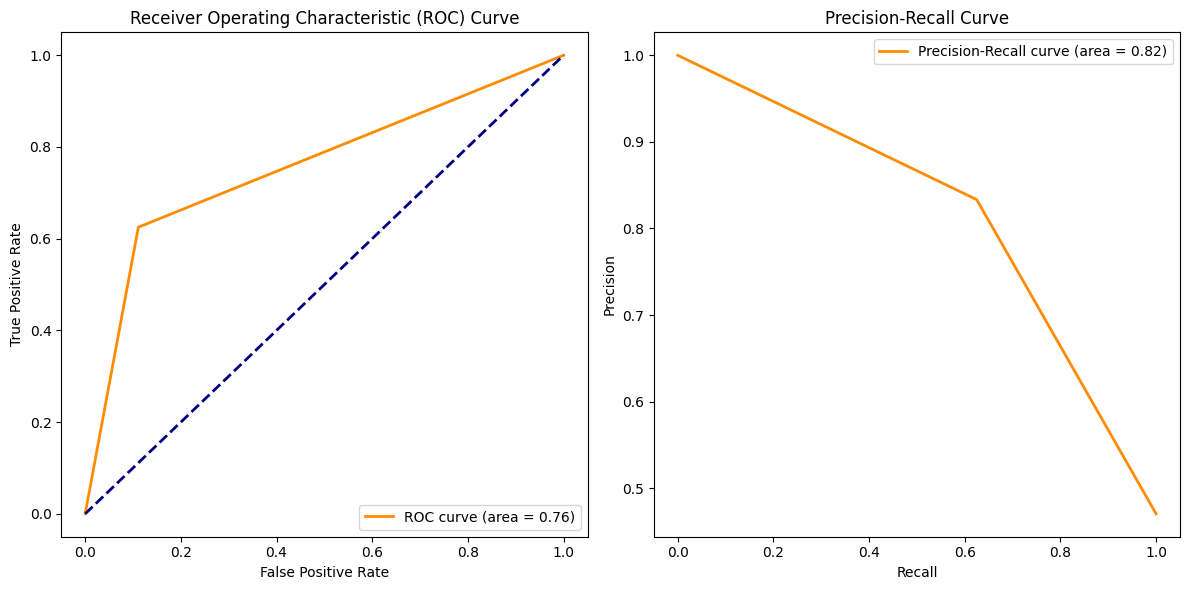

In [ ]:
# AdaBoost
param_grid_adaboost = {'n_estimators': [50, 100, 150],
                       'learning_rate': [0.01, 0.1, 1]}

grid_search_adaboost = GridSearchCV(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                                                       random_state=42),
                                    param_grid_adaboost,
                                    cv=5,
                                    scoring='accuracy',
                                    n_jobs=-1)
grid_search_adaboost.fit(X_train, y_train)

# Best hyperparameters for AdaBoost
best_params_adaboost = grid_search_adaboost.best_params_
print("Best hyperparameters for AdaBoost:", best_params_adaboost)

# Evaluate AdaBoost on the test set with the best hyperparameters
best_adaboost_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                                         **best_params_adaboost,
                                         random_state=42)
best_adaboost_model.fit(X_train, y_train)
y_pred_adaboost = best_adaboost_model.predict(X_test)

# Evaluate AdaBoost
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
confusion_matrix_adaboost = confusion_matrix(y_test, y_pred_adaboost)
classification_report_adaboost = classification_report(y_test, y_pred_adaboost)

print(f'AdaBoost Accuracy: {accuracy_adaboost}')
# print('Confusion Matrix (AdaBoost):\n', confusion_matrix_adaboost)
print('Classification Report (AdaBoost):\n', classification_report_adaboost)

# Visualize the results
plot_confusion_matrix(y_test, y_pred_adaboost, classes=['Class 0', 'Class 1'], normalize=True)

# Visualize the ROC and Precision-Recall curves
plot_roc_and_pr_curves(y_test, y_pred_adaboost)

### **XGBoost Model**

Best hyperparameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
XGBoost Accuracy: 0.8235294117647058
Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.86      0.75      0.80         8

    accuracy                           0.82        17
   macro avg       0.83      0.82      0.82        17
weighted avg       0.83      0.82      0.82        17



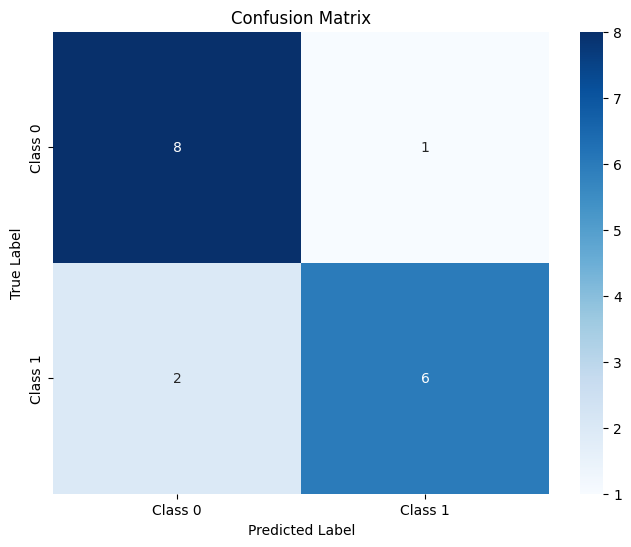

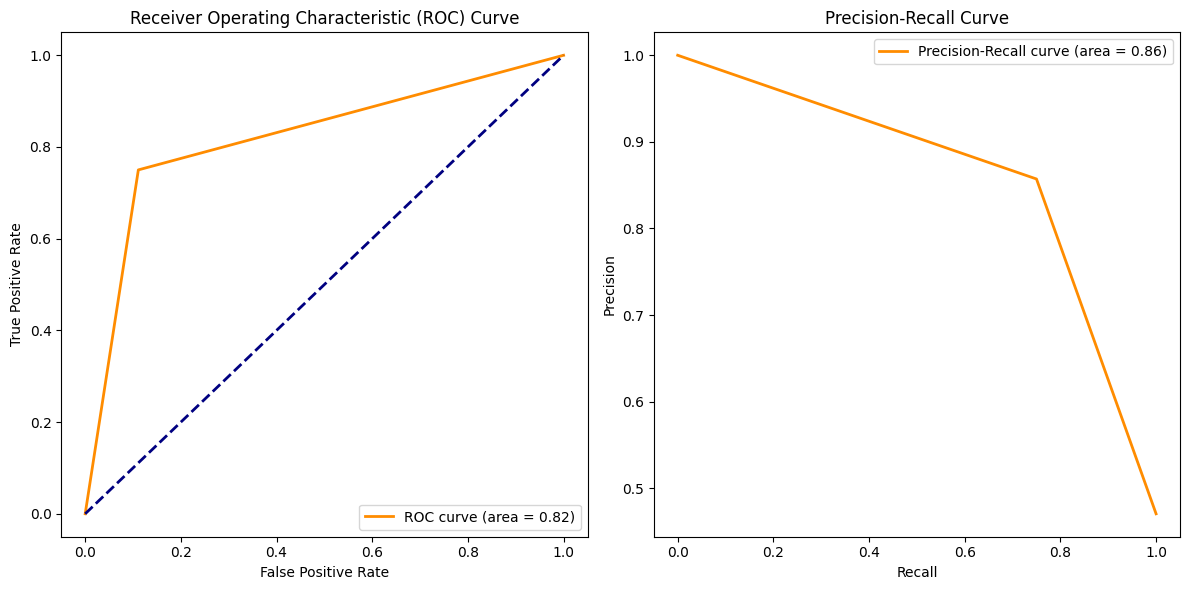

In [ ]:
# XGBoost
param_grid_xgboost = {'n_estimators': [50, 100, 150],
                      'learning_rate': [0.01, 0.1, 1],
                      'max_depth': [3, 5, 7]}

grid_search_xgboost = GridSearchCV(XGBClassifier(random_state=42),
                                   param_grid_xgboost,
                                   cv=5,
                                   scoring='accuracy',
                                   n_jobs=-1)
grid_search_xgboost.fit(X_train, y_train)

# Best hyperparameters for XGBoost
best_params_xgboost = grid_search_xgboost.best_params_
print("Best hyperparameters for XGBoost:", best_params_xgboost)

# Evaluate XGBoost on the test set with the best hyperparameters
best_xgboost_model = XGBClassifier(**best_params_xgboost, random_state=42)
best_xgboost_model.fit(X_train, y_train)
y_pred_xgboost = best_xgboost_model.predict(X_test)

# Evaluate XGBoost
accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)
confusion_matrix_xgboost = confusion_matrix(y_test, y_pred_xgboost)
classification_report_xgboost = classification_report(y_test, y_pred_xgboost)

print(f'XGBoost Accuracy: {accuracy_xgboost}')
# print('Confusion Matrix (XGBoost):\n', confusion_matrix_xgboost)
print('Classification Report (XGBoost):\n', classification_report_xgboost)

# Visualize the results
plot_confusion_matrix(y_test, y_pred_xgboost, classes=['Class 0', 'Class 1'], normalize=True)

# Visualize the ROC and Precision-Recall curves
plot_roc_and_pr_curves(y_test, y_pred_xgboost)

Best hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Random Forest Accuracy: 0.8823529411764706
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       1.00      0.75      0.86         8

    accuracy                           0.88        17
   macro avg       0.91      0.88      0.88        17
weighted avg       0.90      0.88      0.88        17



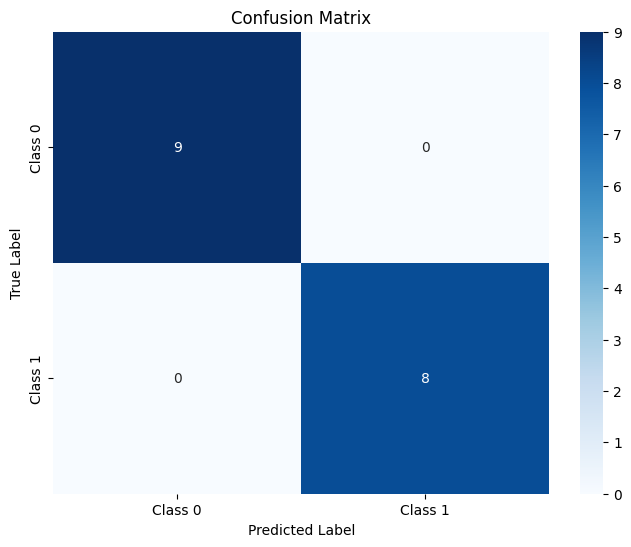

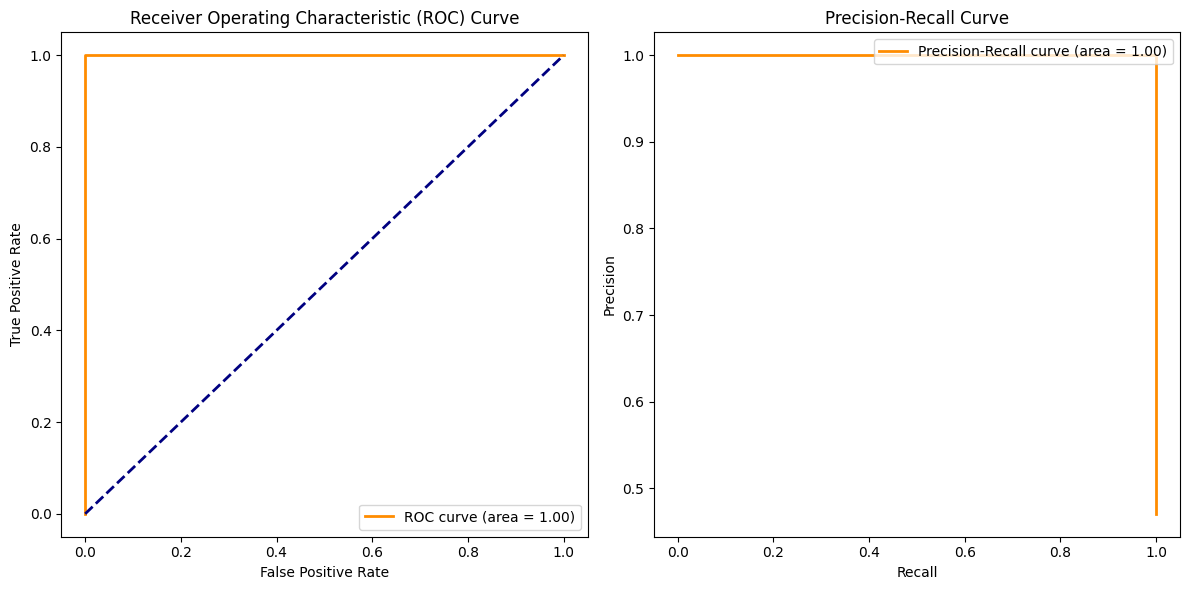

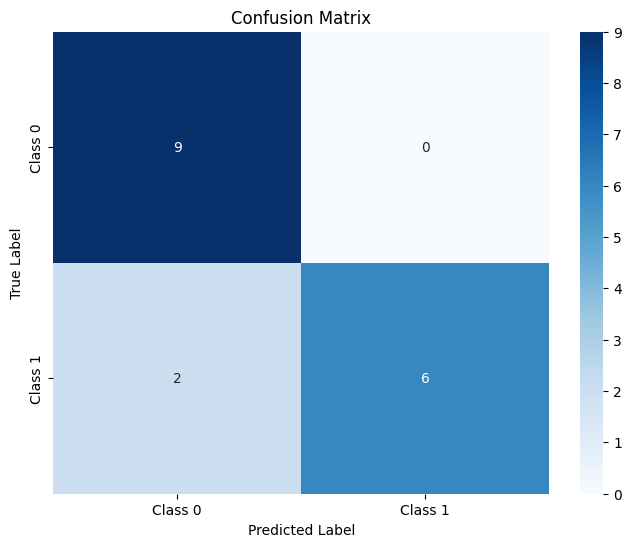

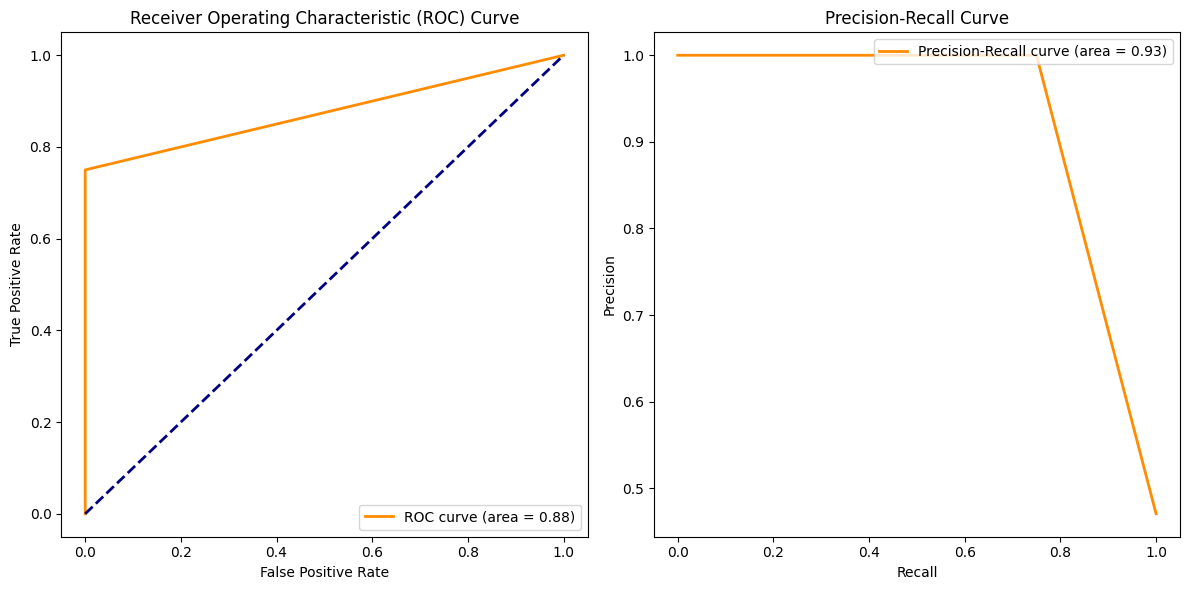

In [ ]:
# Random Forest
param_grid_random_forest = {'n_estimators': [50, 100, 150],
                             'max_depth': [None, 10, 20, 30],
                             'min_samples_split': [2, 5, 10],
                             'min_samples_leaf': [1, 2, 4]}

grid_search_random_forest = GridSearchCV(RandomForestClassifier(random_state=42),
                                          param_grid_random_forest,
                                          cv=5,
                                          scoring='accuracy',
                                          n_jobs=-1)
grid_search_random_forest.fit(X_train, y_train)

# Best hyperparameters for Random Forest
best_params_random_forest = grid_search_random_forest.best_params_
print("Best hyperparameters for Random Forest:", best_params_random_forest)

# Evaluate Random Forest on the test set with the best hyperparameters
best_random_forest_model = RandomForestClassifier(**best_params_random_forest, random_state=42)
best_random_forest_model.fit(X_train, y_train)
y_pred_random_forest = best_random_forest_model.predict(X_test)

# Evaluate Random Forest
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
confusion_matrix_random_forest = confusion_matrix(y_test, y_pred_random_forest)
classification_report_random_forest = classification_report(y_test, y_pred_random_forest)

print(f'Random Forest Accuracy: {accuracy_random_forest}')
# print('Confusion Matrix (Random Forest):\n', confusion_matrix_random_forest)
print('Classification Report (Random Forest):\n', classification_report_random_forest)

# Visualize the results
plot_confusion_matrix(y_test, y_pred_svm, classes=['Class 0', 'Class 1'], normalize=True)

# Visualize the ROC and Precision-Recall curves
plot_roc_and_pr_curves(y_test, y_pred_svm)

# Visualize the results
plot_confusion_matrix(y_test, y_pred_random_forest, classes=['Class 0', 'Class 1'], normalize=True)

# Visualize the ROC and Precision-Recall curves
plot_roc_and_pr_curves(y_test, y_pred_random_forest)


**Top 20 Important features**

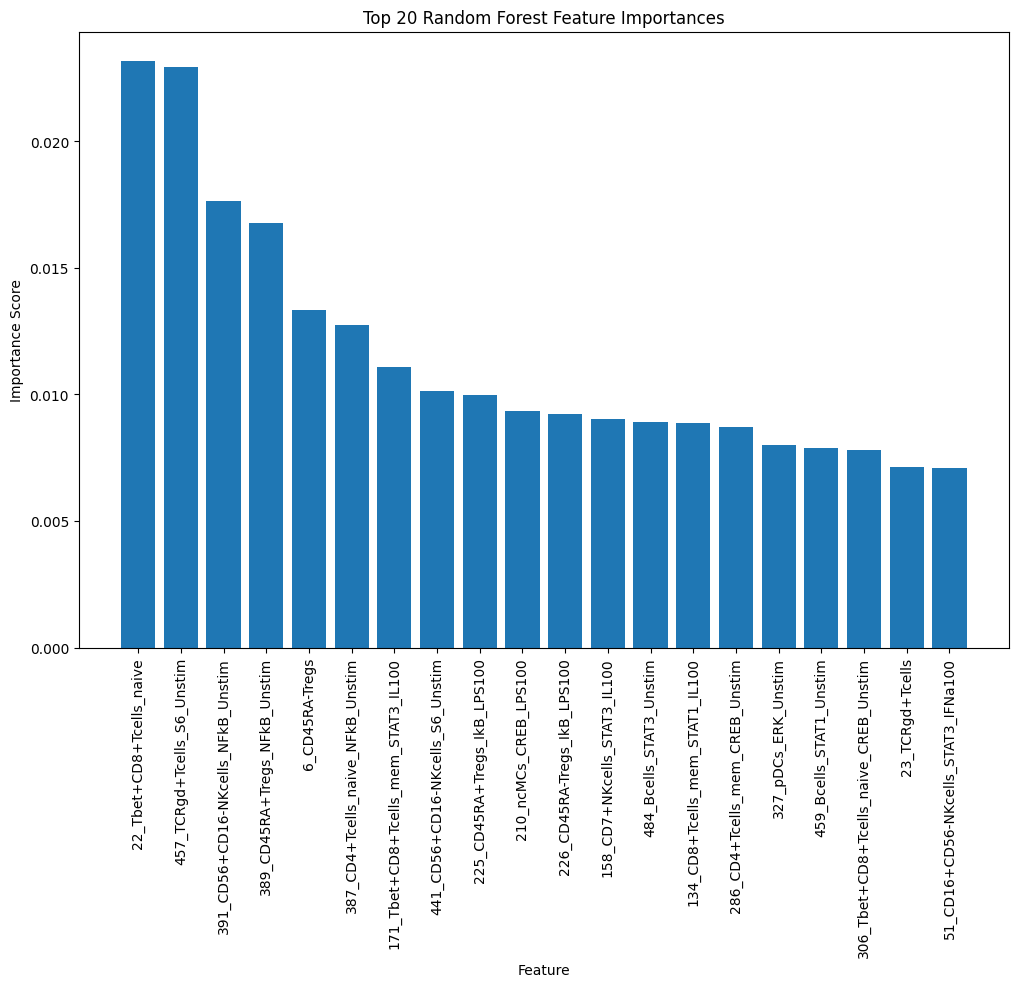

In [ ]:
# Get feature importances
feature_importances = best_random_forest_model.feature_importances_

# Get the indices of the top 20 features
top20_indices = feature_importances.argsort()[::-1][:20]

# Get the names of the top 20 features
top20_feature_names = X_train.columns[top20_indices]

# Plot the top 20 feature importances
plt.figure(figsize=(12, 8))
plt.bar(range(20), feature_importances[top20_indices], align="center")
plt.xticks(range(20), top20_feature_names, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Top 20 Random Forest Feature Importances")
plt.show()

# **Report**


**Observations:**
- The Support Vector Machine (SVM) achieved perfect accuracy (100%) on the given dataset.
- Decision Tree and XGBoost both showed competitive performance with accuracies around 82-83%.
- Random Forest performed well with an accuracy of 88.24%, demonstrating robustness.

**Note:**
- The results were obtained without data normalization, and normalization did not significantly impact the performance.
